In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pathlib
import glob

In [2]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFilter
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
from multiprocessing import Pool
from tqdm import tqdm
data = []
class_folders = ['benign', 'malignant','normal']
for label, folder in enumerate(class_folders):
    file_paths = glob.glob(f'/kaggle/input/breast-cancer-image-classification/Ultrasound Breast Cancer ImageDSET/Dataset_BUSI_with_GT/{folder}/*.png')
    for file_path in file_paths:
        data.append({'file_path': file_path, 'label': label})
df = pd.DataFrame(data)

In [3]:
data = pd.DataFrame(data)
data

,file_path,label
0,/kaggle/input/breast-cancer-image-classificati...,0
1,/kaggle/input/breast-cancer-image-classificati...,0
2,/kaggle/input/breast-cancer-image-classificati...,0
3,/kaggle/input/breast-cancer-image-classificati...,0
4,/kaggle/input/breast-cancer-image-classificati...,0
...,...,...
8479,/kaggle/input/breast-cancer-image-classificati...,2
8480,/kaggle/input/breast-cancer-image-classificati...,2
8481,/kaggle/input/breast-cancer-image-classificati...,2
8482,/kaggle/input/breast-cancer-image-classificati...,2


In [4]:
import cv2
images = [ ]
for value in data["file_path"]:
    resize_image = cv2.imread(value)
    resize = cv2.resize(resize_image,(224,224))
    images.append(resize)

In [5]:
images[0].shape

(224, 224, 3)

In [6]:
images = np.array(images)

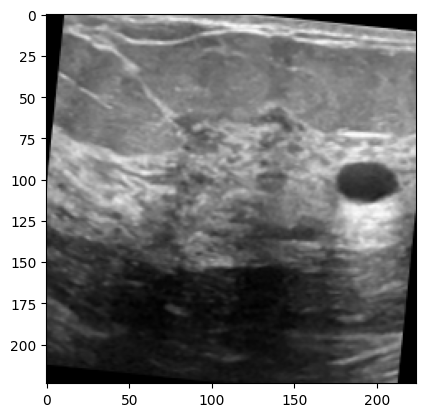

In [7]:
plt.imshow(images[117])
plt.imshow(images[567])
plt.show()

In [8]:
label = []
for value in data["label"]:
    label.append(value)

In [9]:
label = np.array(label)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(images,label,test_size=0.2,random_state=49)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5,random_state=49)

print(len(x_train))
print(len(x_test))

print(len(x_val))
print(len(x_test))

6787
849
848
849


In [11]:
#Custom CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential([
  Conv2D(32,3,activation="relu"),
  MaxPooling2D((2,2)),
  Conv2D(64,3,activation="selu"),
  MaxPooling2D((2,2)),
  Conv2D(128,3,activation="selu"),
  MaxPooling2D((2,2)),
  Conv2D(256,3,activation="selu"),
  Flatten(),
  Dense(1024,activation="selu"),
  Dense(3,activation="softmax")
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["acc"])
history = model.fit(x_train,y_train,batch_size=20,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10


I0000 00:00:1727252469.951953      72 service.cc:145] XLA service 0x7c8c2c158df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727252469.952015      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727252469.952020      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/340 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - acc: 0.3750 - loss: 146.5037 

I0000 00:00:1727252483.568848      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


340/340 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - acc: 0.6716 - loss: 24.6595 - val_acc: 0.8455 - val_loss: 0.4612
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - acc: 0.8827 - loss: 0.3369 - val_acc: 0.8019 - val_loss: 0.5861
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - acc: 0.9545 - loss: 0.1325 - val_acc: 0.8927 - val_loss: 0.4578
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - acc: 0.9753 - loss: 0.0750 - val_acc: 0.8101 - val_loss: 0.6363
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - acc: 0.9777 - loss: 0.0674 - val_acc: 0.8880 - val_loss: 0.5686
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9911 - loss: 0.0342 - val_acc: 0.9127 - val_loss: 0.4905
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9887 - loss: 0.0489 - val_acc: 0.9068 - val_loss: 0.5391
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - acc: 0.9676 - loss: 0.1229 - val_acc: 0.8573 - val_loss: 1.2247
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/s

In [12]:
model.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.9313 - loss: 0.8291


[0.8084835410118103, 0.9234393239021301]

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       405
           1       0.93      0.93      0.93       422
           2       1.00      0.68      0.81        22

    accuracy                           0.92       849
   macro avg       0.95      0.85      0.89       849
weighted avg       0.92      0.92      0.92       849



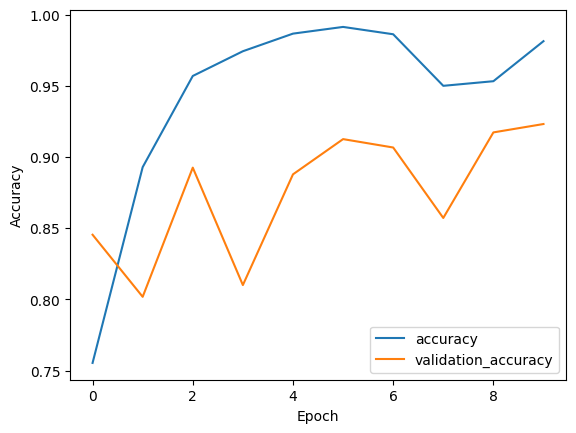

In [13]:
from sklearn.metrics import classification_report

predict = model.predict(x_test)
res = np.argmax(predict, axis=1)


report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
#Custom CNN Model with AdamMax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam

model1 = Sequential([
  Conv2D(32,3,activation="relu"),
  MaxPooling2D((2,2)),
  Conv2D(64,3,activation="selu"),
  MaxPooling2D((2,2)),
  Conv2D(128,3,activation="selu"),
  MaxPooling2D((2,2)),
  Conv2D(256,3,activation="selu"),
  Flatten(),
  Dense(1024,activation="selu"),
  Dense(3,activation="softmax")
])
from tensorflow.keras.optimizers import Adamax
model1.compile(optimizer=Adamax(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
history = model.fit(x_train,
                    y_train,
                    batch_size=20,
                    epochs=10,
                    validation_data=(x_val,y_val))

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - acc: 0.9754 - loss: 0.0837 - val_acc: 0.9233 - val_loss: 0.5539
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9942 - loss: 0.0247 - val_acc: 0.9033 - val_loss: 0.5896
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9867 - loss: 0.0391 - val_acc: 0.9104 - val_loss: 0.6328
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - acc: 0.9792 - loss: 0.0855 - val_acc: 0.8608 - val_loss: 0.8821
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9825 - loss: 0.0572 - val_acc: 0.9175 - val_loss: 0.6026
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9925 - loss: 0.0427 - val_acc: 0.9281 - val_loss: 0.6463
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - acc: 0.9873 - loss: 0.0573 - val_acc: 0.9222 - val_loss: 0.7372
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - acc: 0.9885 - loss: 0.0348 - val_acc: 0.9139 - val_loss: 0.8144
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 

In [15]:
model1.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - acc: 0.4812 - loss: 16.3697


[15.913365364074707, 0.48763251304626465]

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.17      0.01      0.01       405
           1       0.50      0.97      0.66       422
           2       0.00      0.00      0.00        22

    accuracy                           0.49       849
   macro avg       0.22      0.33      0.23       849
weighted avg       0.33      0.49      0.34       849



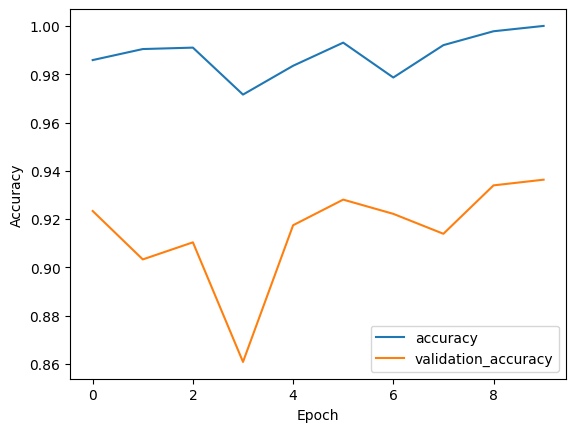

In [16]:
from sklearn.metrics import classification_report

predict = model1.predict(x_test)
res = np.argmax(predict, axis=1)


report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
#CNN Model with only Dropout layers
model2=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='selu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='gelu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="gelu"),
    layers.Dropout(0.3),
    layers.Dense(128,activation="gelu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="gelu"),
    layers.Dropout(0.3),
    layers.Dense(1024,activation="gelu"),
    layers.Dense(3,activation="softmax")
])
model2.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["acc"])
history = model2.fit(x_train,y_train,batch_size=20,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.4991 - loss: 6.4616

I0000 00:00:1727252951.532123      71 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion', 48 bytes spill stores, 48 bytes spill loads



340/340 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - acc: 0.4991 - loss: 6.4510 - val_acc: 0.6521 - val_loss: 0.7828
Epoch 2/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.5693 - loss: 0.7943 - val_acc: 0.6486 - val_loss: 0.6957
Epoch 3/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.6633 - loss: 0.6936 - val_acc: 0.7583 - val_loss: 0.5646
Epoch 4/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.7262 - loss: 0.5919 - val_acc: 0.8019 - val_loss: 0.4765
Epoch 5/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.7982 - loss: 0.4676 - val_acc: 0.8467 - val_loss: 0.3969
Epoch 6/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.8521 - loss: 0.3682 - val_acc: 0.8514 - val_loss: 0.3860
Epoch 7/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.8931 - loss: 0.3001 - val_acc: 0.8880 - val_loss: 0.3048
Epoch 8/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.9064 - loss: 0.2478 - val_acc: 0.8915 - val_loss: 0.2842
Epoch 9/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc

In [18]:
model2.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9130 - loss: 0.4262


[0.41729816794395447, 0.9034157991409302]

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       405
           1       0.93      0.90      0.91       422
           2       1.00      0.64      0.78        22

    accuracy                           0.90       849
   macro avg       0.93      0.82      0.86       849
weighted avg       0.91      0.90      0.90       849



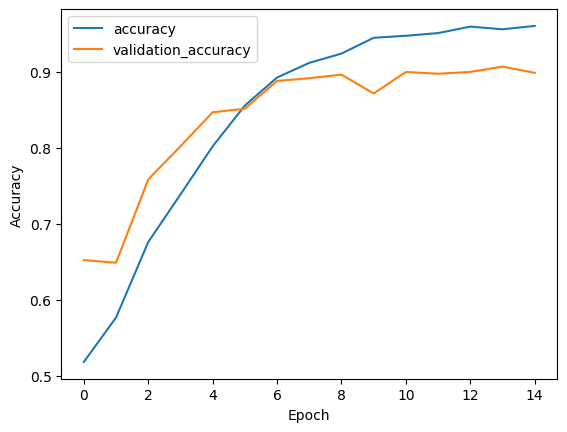

In [19]:
from sklearn.metrics import classification_report
predict = model2.predict(x_test)
res = np.argmax(predict, axis=1)
report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
#CNN Model with only Dropout layers
model22=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='selu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='gelu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="gelu"),
    layers.Dropout(0.3),
    layers.Dense(128,activation="gelu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="gelu"),
    layers.Dropout(0.3),
    layers.Dense(1024,activation="gelu"),
    layers.Dense(3,activation="softmax")
])
from tensorflow.keras.optimizers import Adamax
model22.compile(optimizer=Adamax(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

history = model22.fit(x_train,
                    y_train,
                    batch_size=20,
                    epochs=10,
                    validation_data=(x_val,y_val))

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.5228 - loss: 4.8347

I0000 00:00:1727253064.538681      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion', 48 bytes spill stores, 48 bytes spill loads



340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - acc: 0.5229 - loss: 4.8275 - val_acc: 0.6085 - val_loss: 0.7518
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.6180 - loss: 0.7900 - val_acc: 0.6887 - val_loss: 0.6676
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.6344 - loss: 0.7415 - val_acc: 0.7052 - val_loss: 0.6289
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.6624 - loss: 0.7059 - val_acc: 0.7252 - val_loss: 0.5807
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.6789 - loss: 0.6581 - val_acc: 0.7642 - val_loss: 0.5550
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.7115 - loss: 0.6105 - val_acc: 0.7653 - val_loss: 0.5151
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.7420 - loss: 0.5558 - val_acc: 0.7736 - val_loss: 0.4897
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.7651 - loss: 0.5306 - val_acc: 0.7783 - val_loss: 0.4815
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc

In [21]:
model22.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7804 - loss: 0.4900


[0.5005802512168884, 0.7832744121551514]

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       405
           1       0.92      0.64      0.76       422
           2       0.93      0.64      0.76        22

    accuracy                           0.78       849
   macro avg       0.85      0.74      0.77       849
weighted avg       0.82      0.78      0.78       849



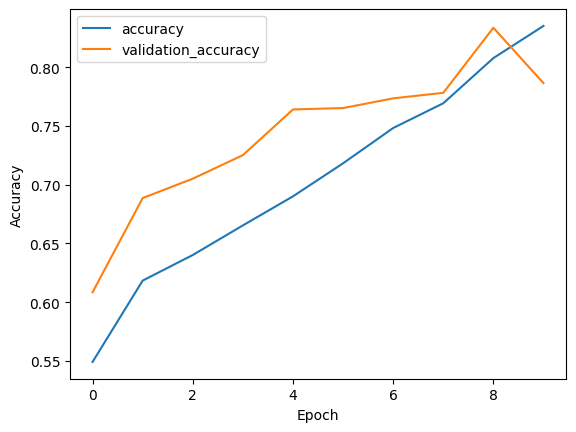

In [22]:
from sklearn.metrics import classification_report
predict = model22.predict(x_test)
res = np.argmax(predict, axis=1)
report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
#CNN MODEL THAT USES FILTERS IN ALL THE LAYERS
model3=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="selu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="gelu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="gelu"),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3,activation="gelu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024,activation="gelu"),
    layers.Dense(3,activation="softmax")
])
model3.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["acc"])
history = model3.fit(x_train,y_train,batch_size=20,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.7047 - loss: 0.6282

I0000 00:00:1727253159.530630      71 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_2', 8 bytes spill stores, 8 bytes spill loads



340/340 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - acc: 0.7049 - loss: 0.6279 - val_acc: 0.8373 - val_loss: 0.4102
Epoch 2/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.8707 - loss: 0.3150 - val_acc: 0.9222 - val_loss: 0.2145
Epoch 3/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - acc: 0.9396 - loss: 0.1567 - val_acc: 0.9481 - val_loss: 0.1606
Epoch 4/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9753 - loss: 0.0724 - val_acc: 0.9434 - val_loss: 0.1714
Epoch 5/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9899 - loss: 0.0327 - val_acc: 0.9575 - val_loss: 0.1561
Epoch 6/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9923 - loss: 0.0248 - val_acc: 0.9540 - val_loss: 0.1896
Epoch 7/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9935 - loss: 0.0172 - val_acc: 0.9458 - val_loss: 0.2571
Epoch 8/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9931 - loss: 0.0147 - val_acc: 0.9481 - val_loss: 0.2181
Epoch 9/15
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/st

In [24]:
model3.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9451 - loss: 0.3544


[0.33359065651893616, 0.9446407556533813]

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       405
           1       0.94      0.97      0.96       422
           2       0.79      0.68      0.73        22

    accuracy                           0.94       849
   macro avg       0.90      0.86      0.88       849
weighted avg       0.94      0.94      0.94       849



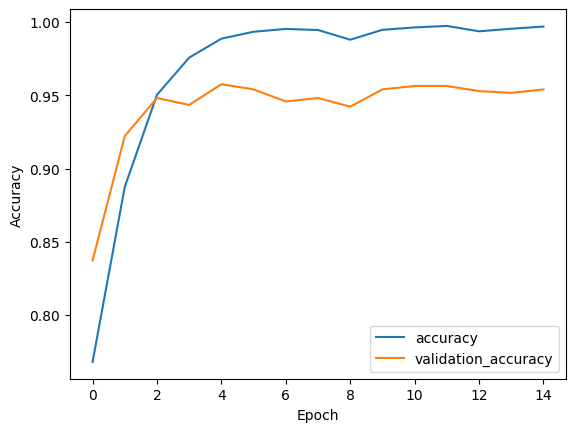

In [25]:
from sklearn.metrics import classification_report
predict = model3.predict(x_test)
res = np.argmax(predict, axis=1)
report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
#CNN MODEL THAT USES FILTERS IN ALL THE LAYERS
model33=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="selu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="gelu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="gelu"),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3,activation="gelu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024,activation="gelu"),
    layers.Dense(3,activation="softmax")
])
from tensorflow.keras.optimizers import Adamax

model33.compile(optimizer=Adamax(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

history = model33.fit(x_train,
                    y_train,
                    batch_size=20,
                    epochs=10,
                    validation_data=(x_val,y_val))

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - acc: 0.6806 - loss: 0.6805

I0000 00:00:1727253394.344019      70 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_2', 8 bytes spill stores, 8 bytes spill loads



340/340 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - acc: 0.6808 - loss: 0.6802 - val_acc: 0.7936 - val_loss: 0.5295
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - acc: 0.8150 - loss: 0.4515 - val_acc: 0.8160 - val_loss: 0.4230
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - acc: 0.8731 - loss: 0.3271 - val_acc: 0.8844 - val_loss: 0.3242
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9090 - loss: 0.2424 - val_acc: 0.8573 - val_loss: 0.3787
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9434 - loss: 0.1611 - val_acc: 0.9269 - val_loss: 0.2190
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9648 - loss: 0.1061 - val_acc: 0.9351 - val_loss: 0.2188
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9786 - loss: 0.0699 - val_acc: 0.9410 - val_loss: 0.1993
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.9809 - loss: 0.0545 - val_acc: 0.9422 - val_loss: 0.1914
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/st

In [27]:
model33.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9481 - loss: 0.2569


[0.24885019659996033, 0.9434629082679749]

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       405
           1       0.96      0.94      0.95       422
           2       0.94      0.68      0.79        22

    accuracy                           0.94       849
   macro avg       0.94      0.86      0.89       849
weighted avg       0.94      0.94      0.94       849



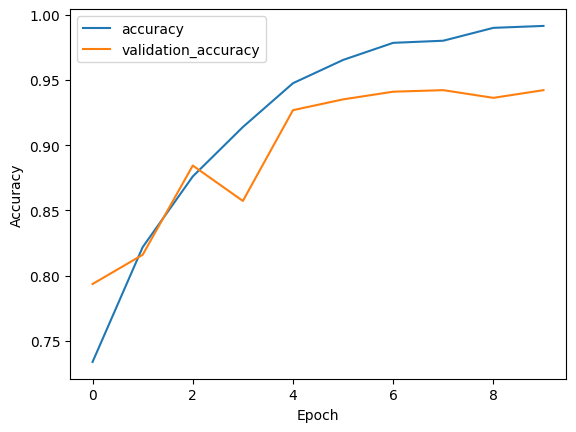

In [28]:
from sklearn.metrics import classification_report
predict = model33.predict(x_test)
res = np.argmax(predict, axis=1)
report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
#InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the ResNet101 base model
model4 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build the transfer learning model
transfer_InceptionV3 = Sequential([
    model4,
    Flatten(),
    Dense(256, activation='selu'),
    Dropout(0.6),
    Dense(128, activation='gelu'),
    Dropout(0.6),
    Dense(64, activation='gelu'),
    Dropout(0.6),
    Dense(32, activation='gelu'),
    Dropout(0.6),
    Dense(3, activation='softmax')
])
transfer_InceptionV3.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming model4 is your current model
x = model4.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # 3 classes as per your code

# Create a new model
transfer_InceptionV3 = Model(inputs=model4.input, outputs=output)

transfer_InceptionV3.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["acc"])
history = transfer_InceptionV3.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - acc: 0.7971 - loss: 0.6083

I0000 00:00:1727253698.035024      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 72 bytes spill stores, 72 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_263', 16 bytes spill stores, 16 bytes spill loads



340/340 ━━━━━━━━━━━━━━━━━━━━ 163s 275ms/step - acc: 0.7976 - loss: 0.6066 - val_acc: 0.9682 - val_loss: 0.0894
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 54s 158ms/step - acc: 0.9733 - loss: 0.0795 - val_acc: 0.9670 - val_loss: 0.0793
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53s 155ms/step - acc: 0.9802 - loss: 0.0540 - val_acc: 0.9587 - val_loss: 0.1475
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53s 156ms/step - acc: 0.9861 - loss: 0.0416 - val_acc: 0.9800 - val_loss: 0.0822
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53s 156ms/step - acc: 0.9805 - loss: 0.0498 - val_acc: 0.9835 - val_loss: 0.0542
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53s 157ms/step - acc: 0.9940 - loss: 0.0179 - val_acc: 0.9717 - val_loss: 0.1269
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53s 157ms/step - acc: 0.9902 - loss: 0.0261 - val_acc: 0.9835 - val_loss: 0.0779
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53s 157ms/step - acc: 0.9892 - loss: 0.0308 - val_acc: 0.9752 - val_loss: 0.0619
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 53

In [31]:
transfer_InceptionV3.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 290ms/step - acc: 0.9731 - loss: 0.1031


[0.0824420154094696, 0.9764428734779358]

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       405
           1       0.99      0.99      0.99       422
           2       0.72      0.95      0.82        22

    accuracy                           0.98       849
   macro avg       0.90      0.97      0.93       849
weighted avg       0.98      0.98      0.98       849



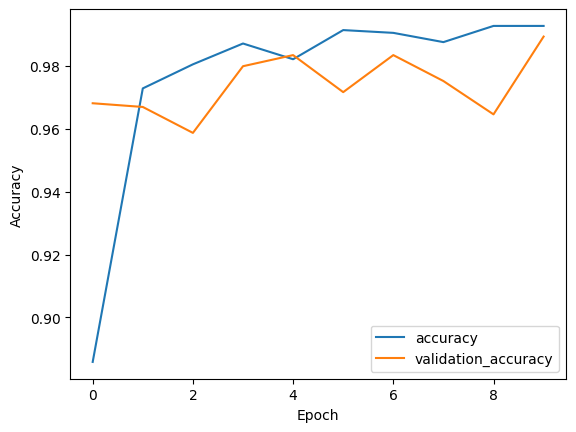

In [32]:
from sklearn.metrics import classification_report

predict = transfer_InceptionV3.predict(x_test)
res = np.argmax(predict, axis=1)


report = classification_report(y_test, res)
print("Classification Report\n", report)

plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


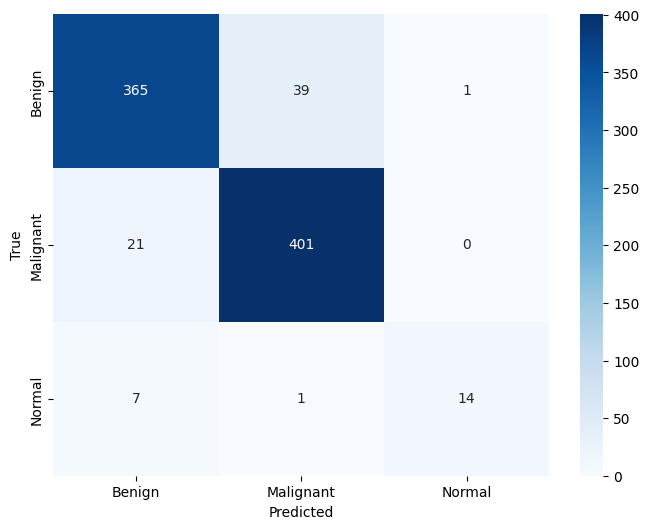

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[365,  39,   1],
       [ 21, 401,   0],
       [  7,   1,  14]])

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_name = ['Benign', 'Malignant', 'Normal']

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)

conf = confusion_matrix(y_true, res)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='g',cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)
conf = confusion_matrix(y_true, res)
conf

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


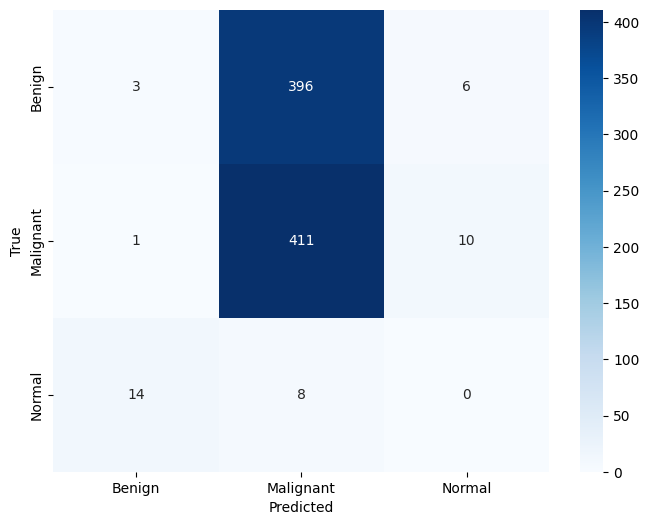

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[365,  39,   1],
       [ 21, 401,   0],
       [  7,   1,  14]])

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_name = ['Benign', 'Malignant', 'Normal']

y_true = y_test
predict = model1.predict(x_test)
res = np.argmax(predict, axis=1)

conf = confusion_matrix(y_true, res)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='g',cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)
conf = confusion_matrix(y_true, res)
conf

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


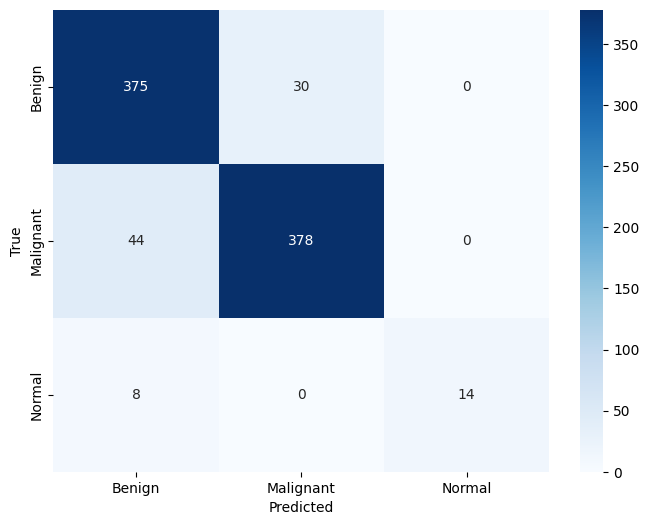

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[365,  39,   1],
       [ 21, 401,   0],
       [  7,   1,  14]])

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_name = ['Benign', 'Malignant', 'Normal']

y_true = y_test
predict = model2.predict(x_test)
res = np.argmax(predict, axis=1)

conf = confusion_matrix(y_true, res)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='g',cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)
conf = confusion_matrix(y_true, res)
conf

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


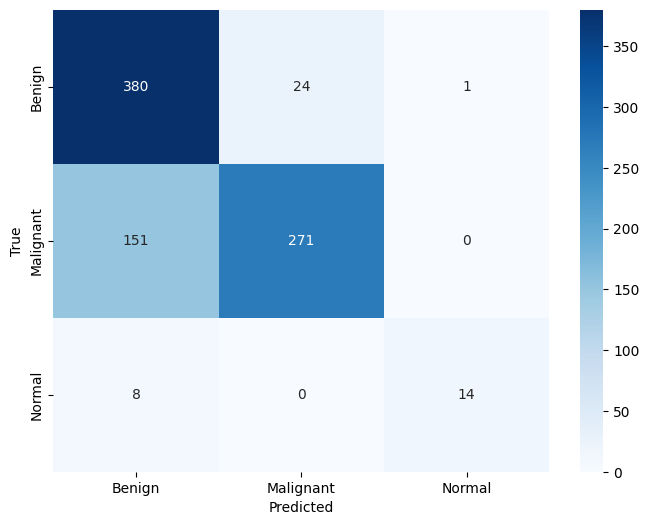

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[365,  39,   1],
       [ 21, 401,   0],
       [  7,   1,  14]])

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_name = ['Benign', 'Malignant', 'Normal']

y_true = y_test
predict = model22.predict(x_test)
res = np.argmax(predict, axis=1)

conf = confusion_matrix(y_true, res)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='g',cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)
conf = confusion_matrix(y_true, res)
conf

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


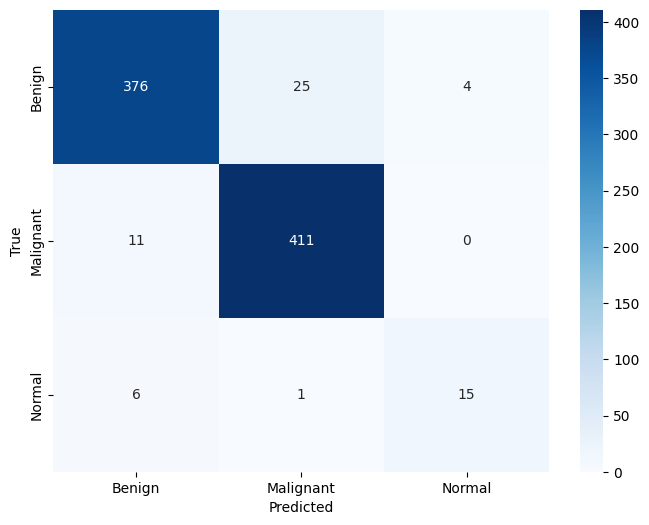

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[365,  39,   1],
       [ 21, 401,   0],
       [  7,   1,  14]])

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_name = ['Benign', 'Malignant', 'Normal']

y_true = y_test
predict = model3.predict(x_test)
res = np.argmax(predict, axis=1)

conf = confusion_matrix(y_true, res)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='g',cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)
conf = confusion_matrix(y_true, res)
conf

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


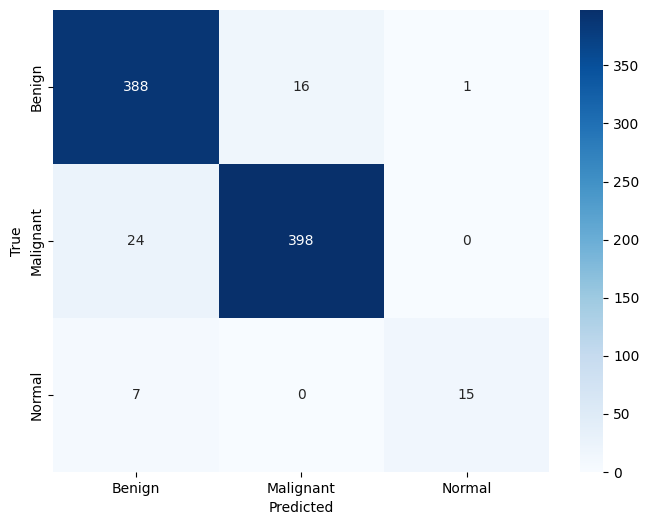

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[365,  39,   1],
       [ 21, 401,   0],
       [  7,   1,  14]])

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_name = ['Benign', 'Malignant', 'Normal']

y_true = y_test
predict = model33.predict(x_test)
res = np.argmax(predict, axis=1)

conf = confusion_matrix(y_true, res)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt='g',cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_true = y_test
predict = model.predict(x_test)
res = np.argmax(predict, axis=1)
conf = confusion_matrix(y_true, res)
conf